<a href="https://colab.research.google.com/github/conextm/python/blob/main/M4_Actividad_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Fin de módulo 4
**Universidad de los Andes | Educación Continua**</br>
**Programa Analítica Agencia Atenea**</br>
*12 de septiembre de 2023*


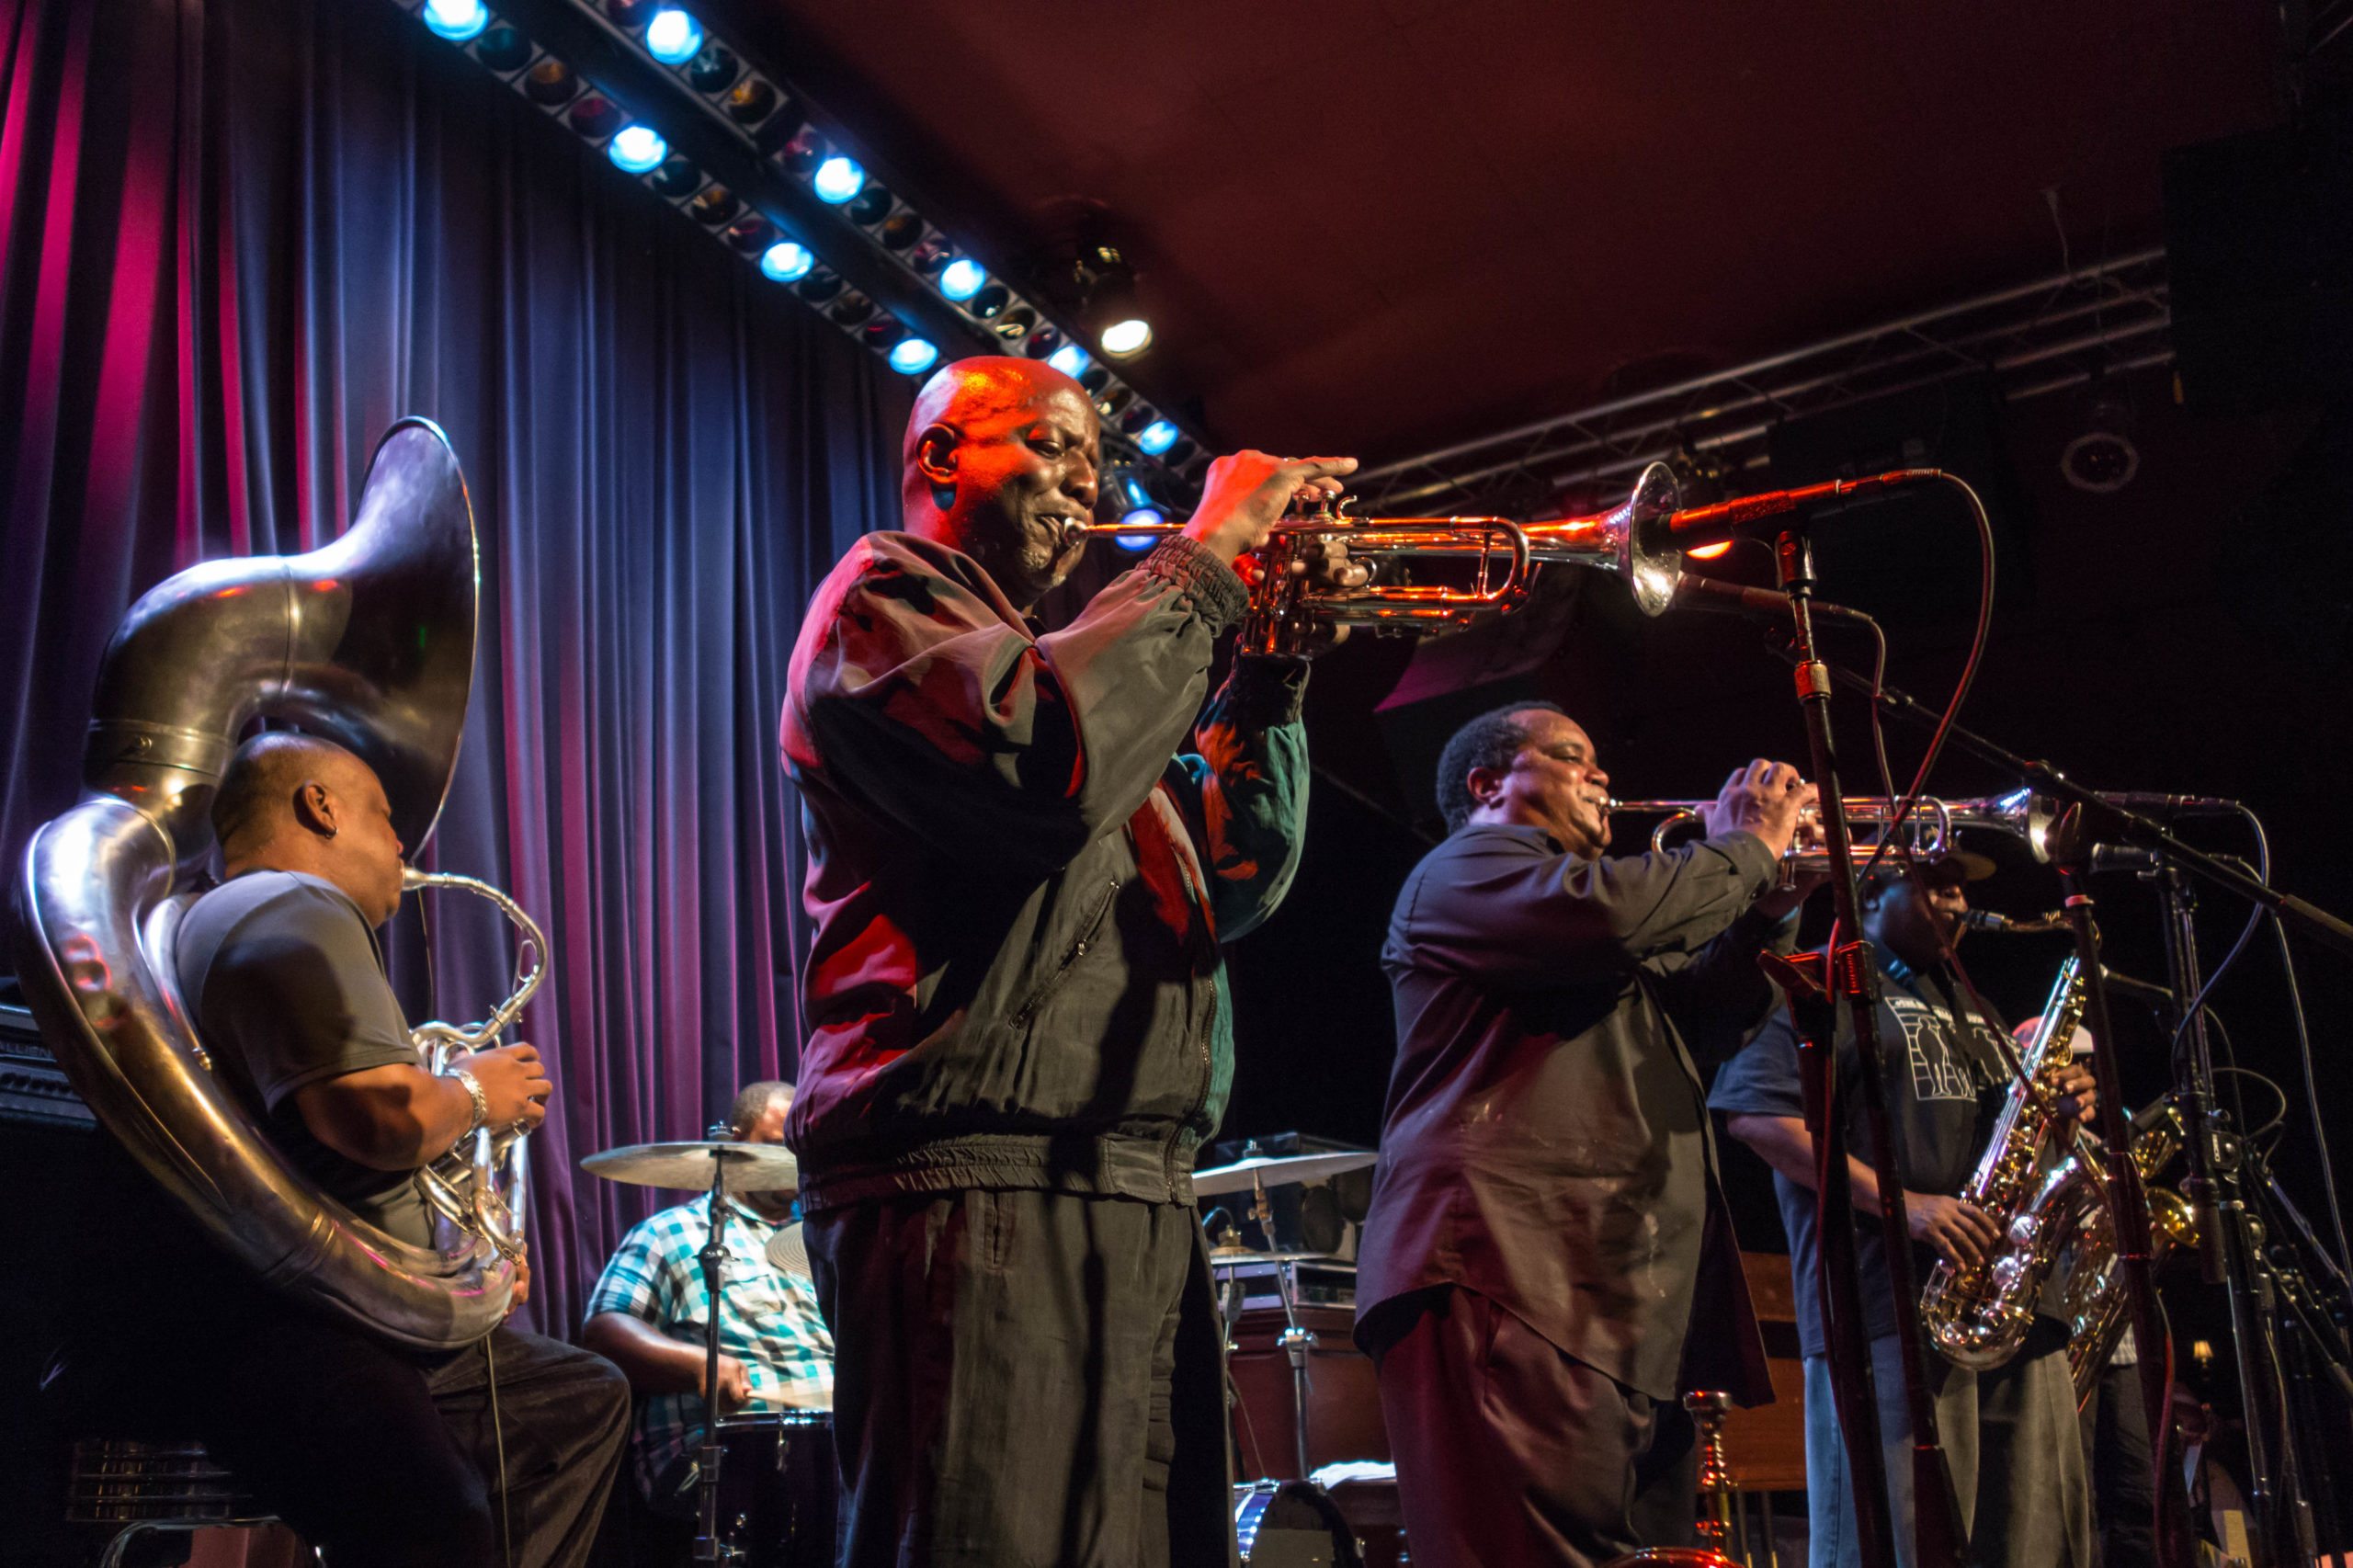

Para esta ocasión usted ha sido encargado/a con la elaboración de un modelo de clasificación que tome información de las piezas musicales y prediga en qué rango de reproducciones (streams) se ubicará esta en la plataforma Spotify.

La [base de datos](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) es la enlazada aquí. Cuenta con información formal y de percepción de más de 900 piezas musicales.

Ejecute a continuación las celdas de descripción de la base de datos, y entrene un modelo de clasificación pasando por todas las etapas de desarrollo indicadas.

## Exploración

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [ ]:
datos

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [ ]:
datos['released_year'].value_counts()

2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

In [ ]:
datos.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [ ]:
datos['key'].value_counts()

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# **EDA**

In [ ]:
print('Filas: ', datos.shape[0])
print('Columnas: ', datos.shape[1])
datos.dtypes
cualicolumns=datos.select_dtypes(exclude=['int64','float64','datetime64']).columns
cuanticolumns=datos.select_dtypes(exclude=['object','datetime64']).columns
fechacolumns=datos.select_dtypes(exclude=['object','float64','int64']).columns
print('El número de variables categóricas es de: ', len(cualicolumns)),
print('El número de variables cuantitativas es de: ', len(cuanticolumns)),
print('El número de variables tipo fecha es de: ', len(fechacolumns))

Filas:  953
Columnas:  24
El número de variables categóricas es de:  7
El número de variables cuantitativas es de:  17
El número de variables tipo fecha es de:  0


<ipython-input-7-aebc216a4efa>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  var= datos.var(axis=0)


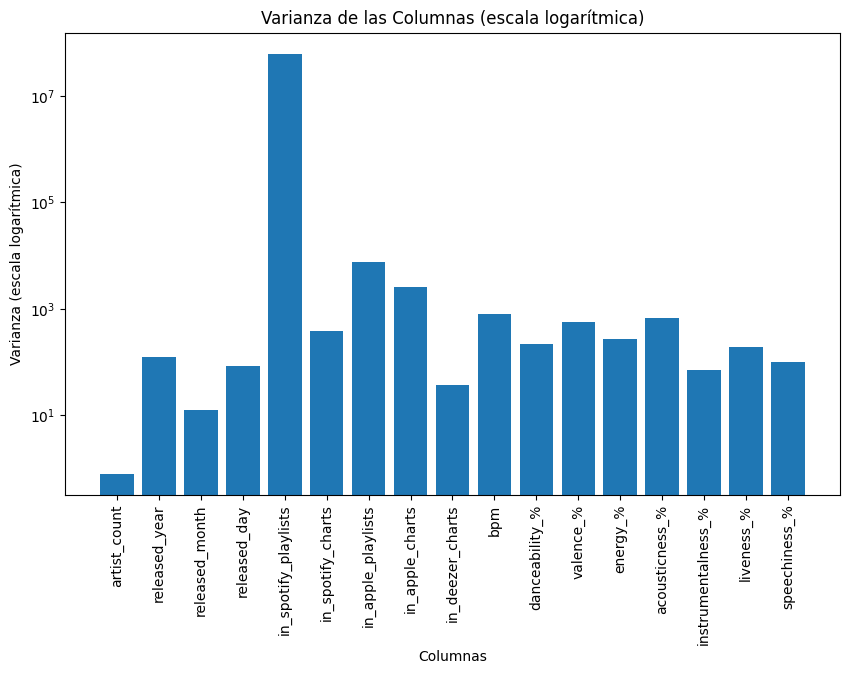

Columna: artist_count, Varianza: 0.7975279303746683
Columna: released_year, Varianza: 123.57030430220358
Columna: released_month, Varianza: 12.719459557170193
Columna: released_day, Varianza: 84.67587097798196
Columna: in_spotify_playlists, Varianza: 62372227.76485358
Columna: in_spotify_charts, Varianza: 383.2194485349229
Columna: in_apple_playlists, Varianza: 7472.131700424136
Columna: in_apple_charts, Varianza: 2563.4212791097552
Columna: in_deezer_charts, Varianza: 36.42845459275001
Columna: bpm, Varianza: 787.2402254710909
Columna: danceability_%, Varianza: 214.0547452979093
Columna: valence_%, Varianza: 551.3400716005185
Columna: energy_%, Varianza: 273.91991014663995
Columna: acousticness_%, Varianza: 675.7960355180898
Columna: instrumentalness_%, Varianza: 70.72473480472986
Columna: liveness_%, Varianza: 187.99764564797587
Columna: speechiness_%, Varianza: 98.26534076379765


<ipython-input-7-aebc216a4efa>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in var.iteritems():


In [ ]:
var= datos.var(axis=0)

plt.figure(figsize=(10, 6))

# se crea una escala log  ya que la varianza de popEst2015 es muy grande
#se determina que esta variable tiene un indice de corr(-0,12)
plt.bar(var.index, var.values)
plt.yscale('log')  # Escala logarítmica en el eje y

# Configurar etiquetas en el eje x
plt.xlabel('Columnas')
plt.xticks(rotation=90)

plt.ylabel('Varianza (escala logarítmica)')
plt.title('Varianza de las Columnas (escala logarítmica)')
plt.show()

for column, value in var.iteritems():
    print(f'Columna: {column}, Varianza: {value}')

In [ ]:
datos.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

in_shazam_charts tiene 50 datos nulos.
key tiene 95 datos nulos.

<Figure size 2000x600 with 0 Axes>

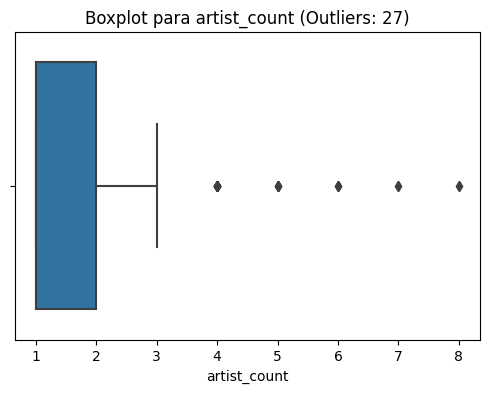

Número total de valores típicos en artist_count: 926
Valores atípicos en artist_count: 27



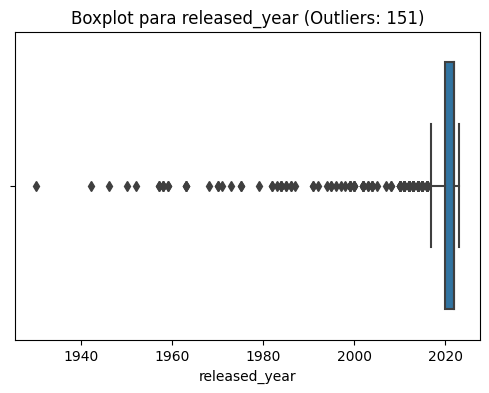

Número total de valores típicos en released_year: 802
Valores atípicos en released_year: 151



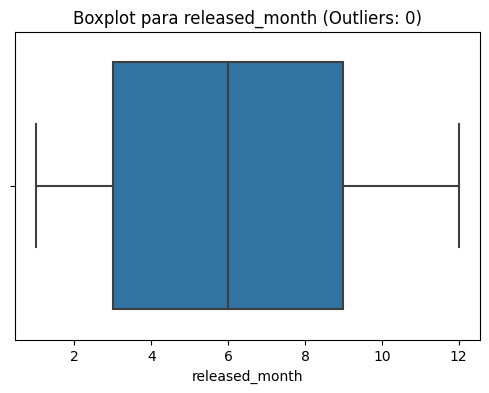

Número total de valores típicos en released_month: 953
Valores atípicos en released_month: 0



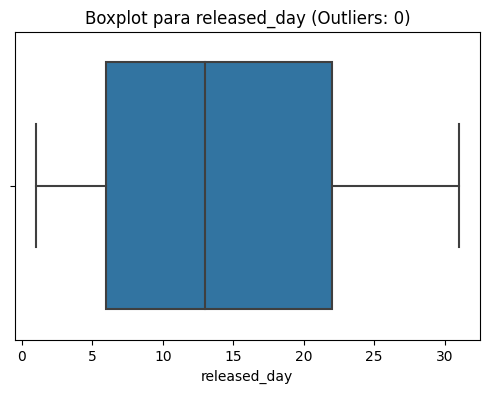

Número total de valores típicos en released_day: 953
Valores atípicos en released_day: 0



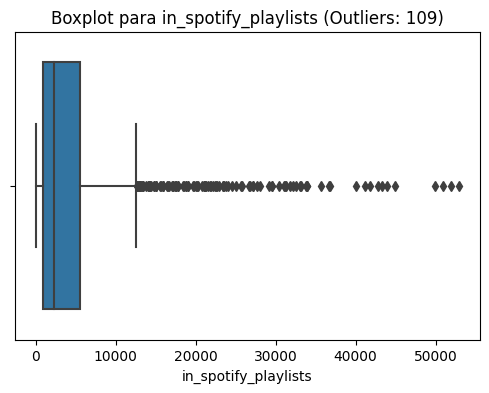

Número total de valores típicos en in_spotify_playlists: 844
Valores atípicos en in_spotify_playlists: 109



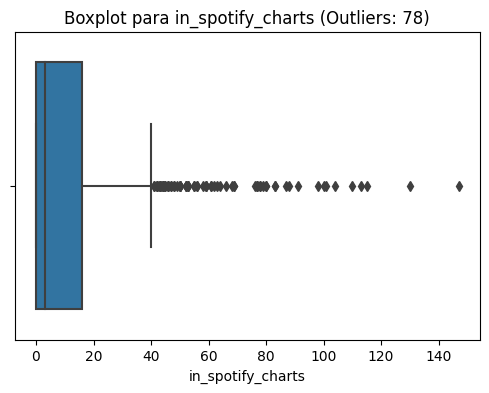

Número total de valores típicos en in_spotify_charts: 875
Valores atípicos en in_spotify_charts: 78



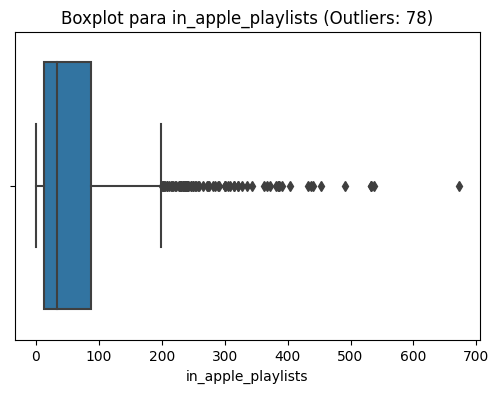

Número total de valores típicos en in_apple_playlists: 875
Valores atípicos en in_apple_playlists: 78



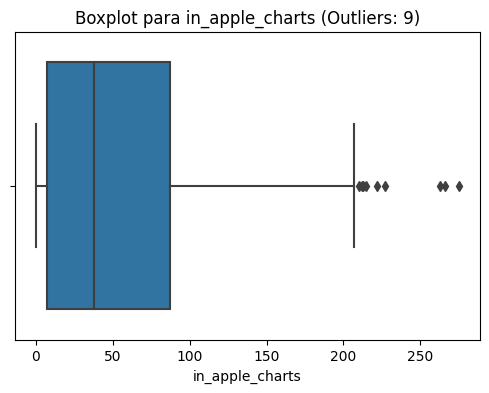

Número total de valores típicos en in_apple_charts: 944
Valores atípicos en in_apple_charts: 9



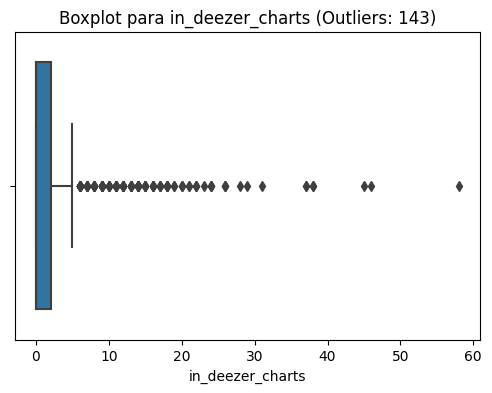

Número total de valores típicos en in_deezer_charts: 810
Valores atípicos en in_deezer_charts: 143



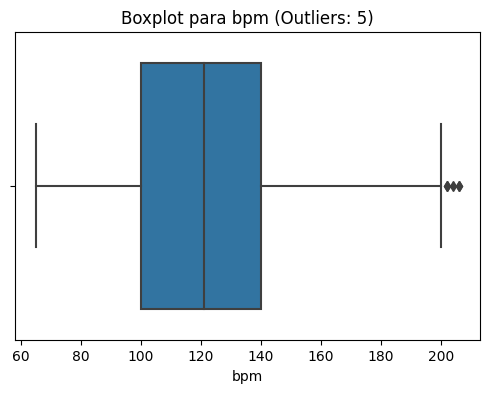

Número total de valores típicos en bpm: 948
Valores atípicos en bpm: 5



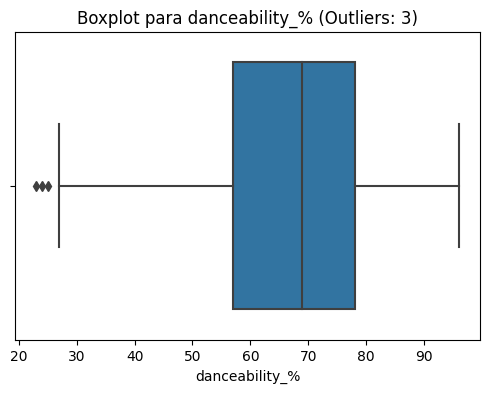

Número total de valores típicos en danceability_%: 950
Valores atípicos en danceability_%: 3



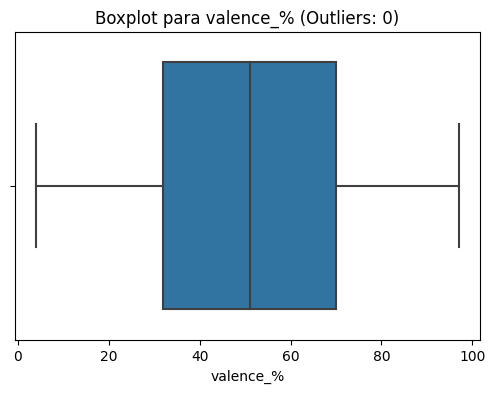

Número total de valores típicos en valence_%: 953
Valores atípicos en valence_%: 0



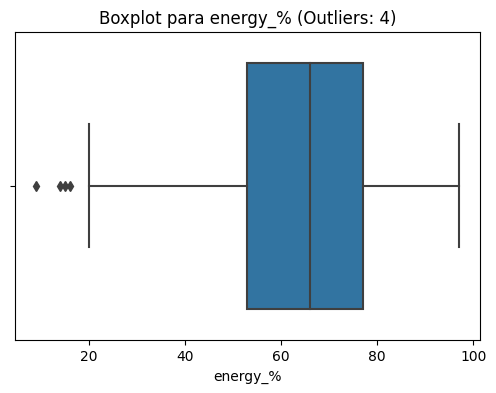

Número total de valores típicos en energy_%: 949
Valores atípicos en energy_%: 4



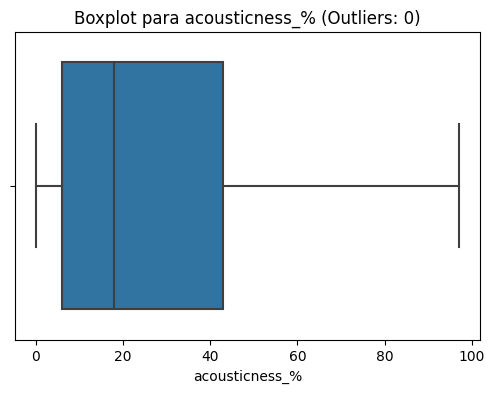

Número total de valores típicos en acousticness_%: 953
Valores atípicos en acousticness_%: 0



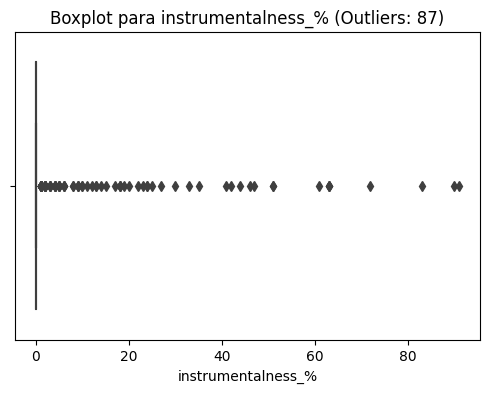

Número total de valores típicos en instrumentalness_%: 866
Valores atípicos en instrumentalness_%: 87



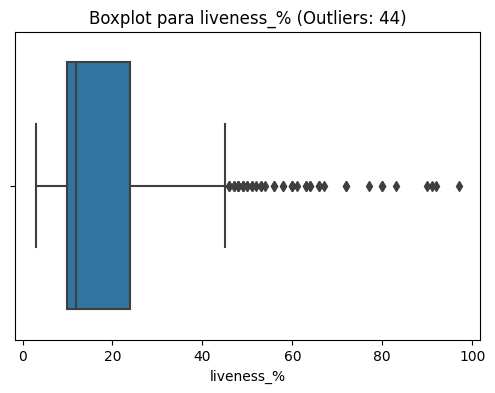

Número total de valores típicos en liveness_%: 909
Valores atípicos en liveness_%: 44



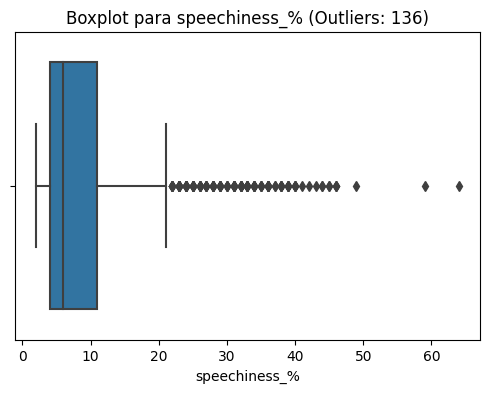

Número total de valores típicos en speechiness_%: 817
Valores atípicos en speechiness_%: 136



In [ ]:
plt.figure(figsize=(20, 6))

threshold = 1.5

# Analizar cada columna del DataFrame
for analizar in datos.columns:
    # Ignorar columnas que no son numéricas
    if pd.api.types.is_numeric_dtype(datos[analizar]):
        Q1 = datos[analizar].quantile(0.25)
        Q3 = datos[analizar].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = datos[(datos[analizar] < lower_bound) | (datos[analizar] > upper_bound)]
        num_outliers = len(outliers)

        # Crear un gráfico de caja con los outliers destacados
        plt.figure(figsize=(6, 4))  # Tamaño de la figura para el gráfico de caja
        sns.boxplot(x=datos[analizar])
        plt.title(f'Boxplot para {analizar} (Outliers: {num_outliers})')
        plt.show()

        print(f'Número total de valores típicos en {analizar}: {953- num_outliers}')
        print(f'Valores atípicos en {analizar}: {num_outliers}\n')

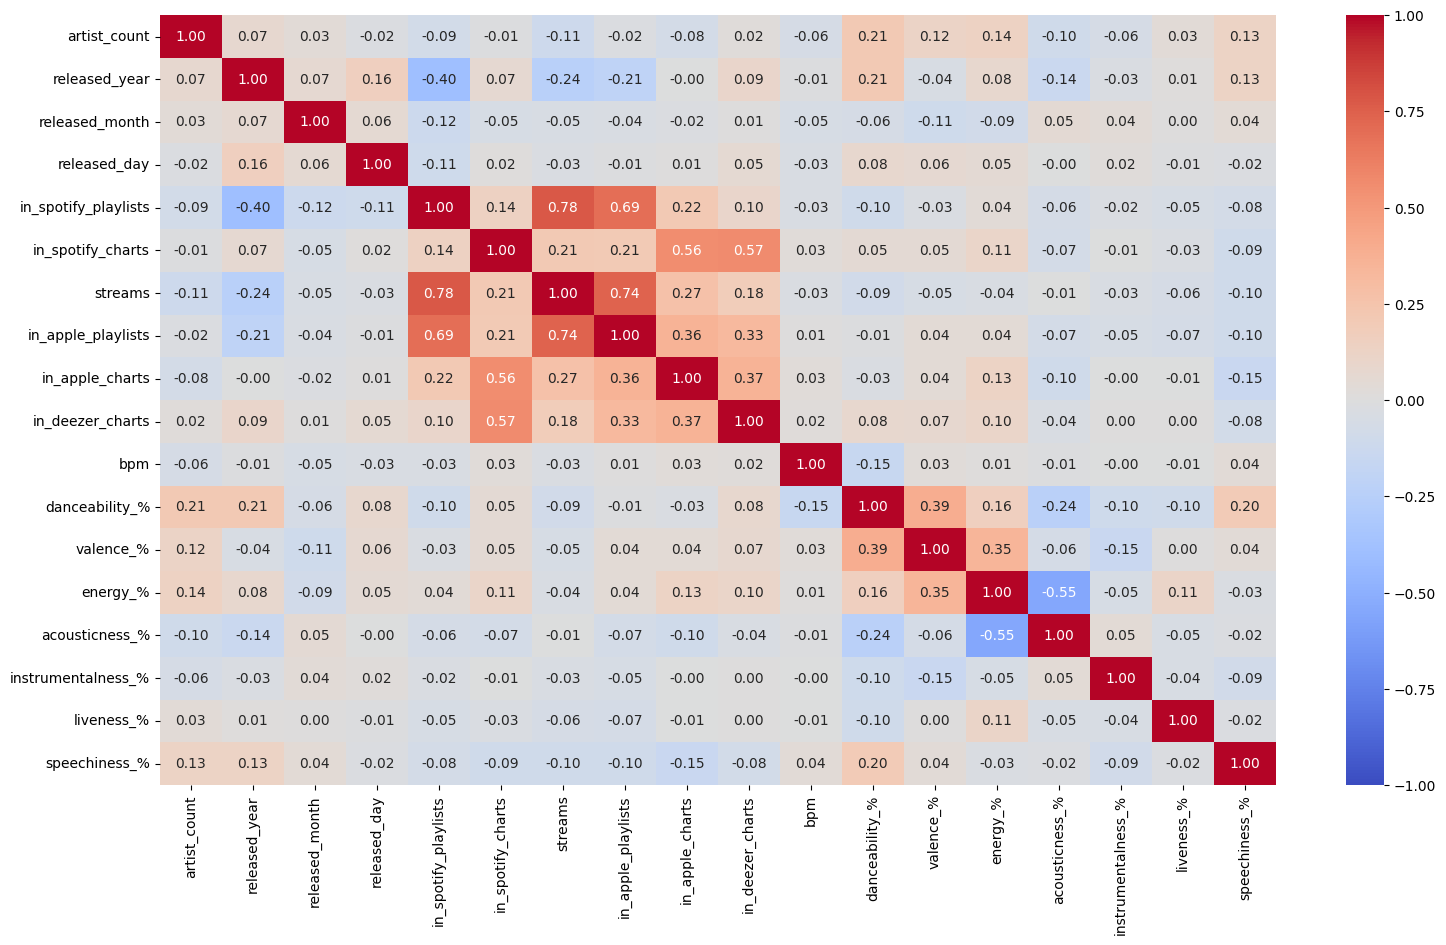

Variables con correlación superior a 0.20 o inferior a -0.20 con 'streams':
released_year          -0.242726
in_spotify_playlists    0.780404
in_spotify_charts       0.214034
streams                 1.000000
in_apple_playlists      0.735321
in_apple_charts         0.269137
Name: streams, dtype: float64


In [ ]:
# Asegúrate de que 'streams' contiene solo valores numéricos
datos.loc[:, 'streams'] = pd.to_numeric(datos['streams'], errors='coerce')

# Elimina filas con valores nulos en la columna 'streams'
datos = datos.dropna(subset=['streams'])

# Filtra solo las columnas numéricas (excluyendo las de tipo string)
datos_numericos = datos.select_dtypes(exclude=['object'])

# Agrega la columna 'streams' a las columnas numéricas
datos_numericos['streams'] = datos['streams']

# Calcula la matriz de correlación para las columnas numéricas, incluyendo 'streams'
correlation_matrix = datos_numericos.corr()

# Aumenta el tamaño del gráfico
plt.figure(figsize=(18, 10))

sns.heatmap(data=correlation_matrix, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='coolwarm')

plt.show()
correlacion_streams = correlation_matrix['streams']
variables_interes = correlacion_streams[(correlacion_streams > 0.20) | (correlacion_streams < -0.20)]

# Imprime las variables de interés
print('Variables con correlación superior a 0.20 o inferior a -0.20 con 'streams':')
print(variables_interes)

Se filtran los datos de mayor correlación a +/- 0.2 con la columna streams para su analisis posterior. Se observa correlaciones altas con las variables released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts' , por lo cual se planea realizar una regresión  lineal multivariada y analisis de estas.

Se observa una tendencia Positiva entre las variables y streams a ecepción de la variable released_year que sugiere que al disminuir el año de lanzamiento los streams tienden a aumentar.

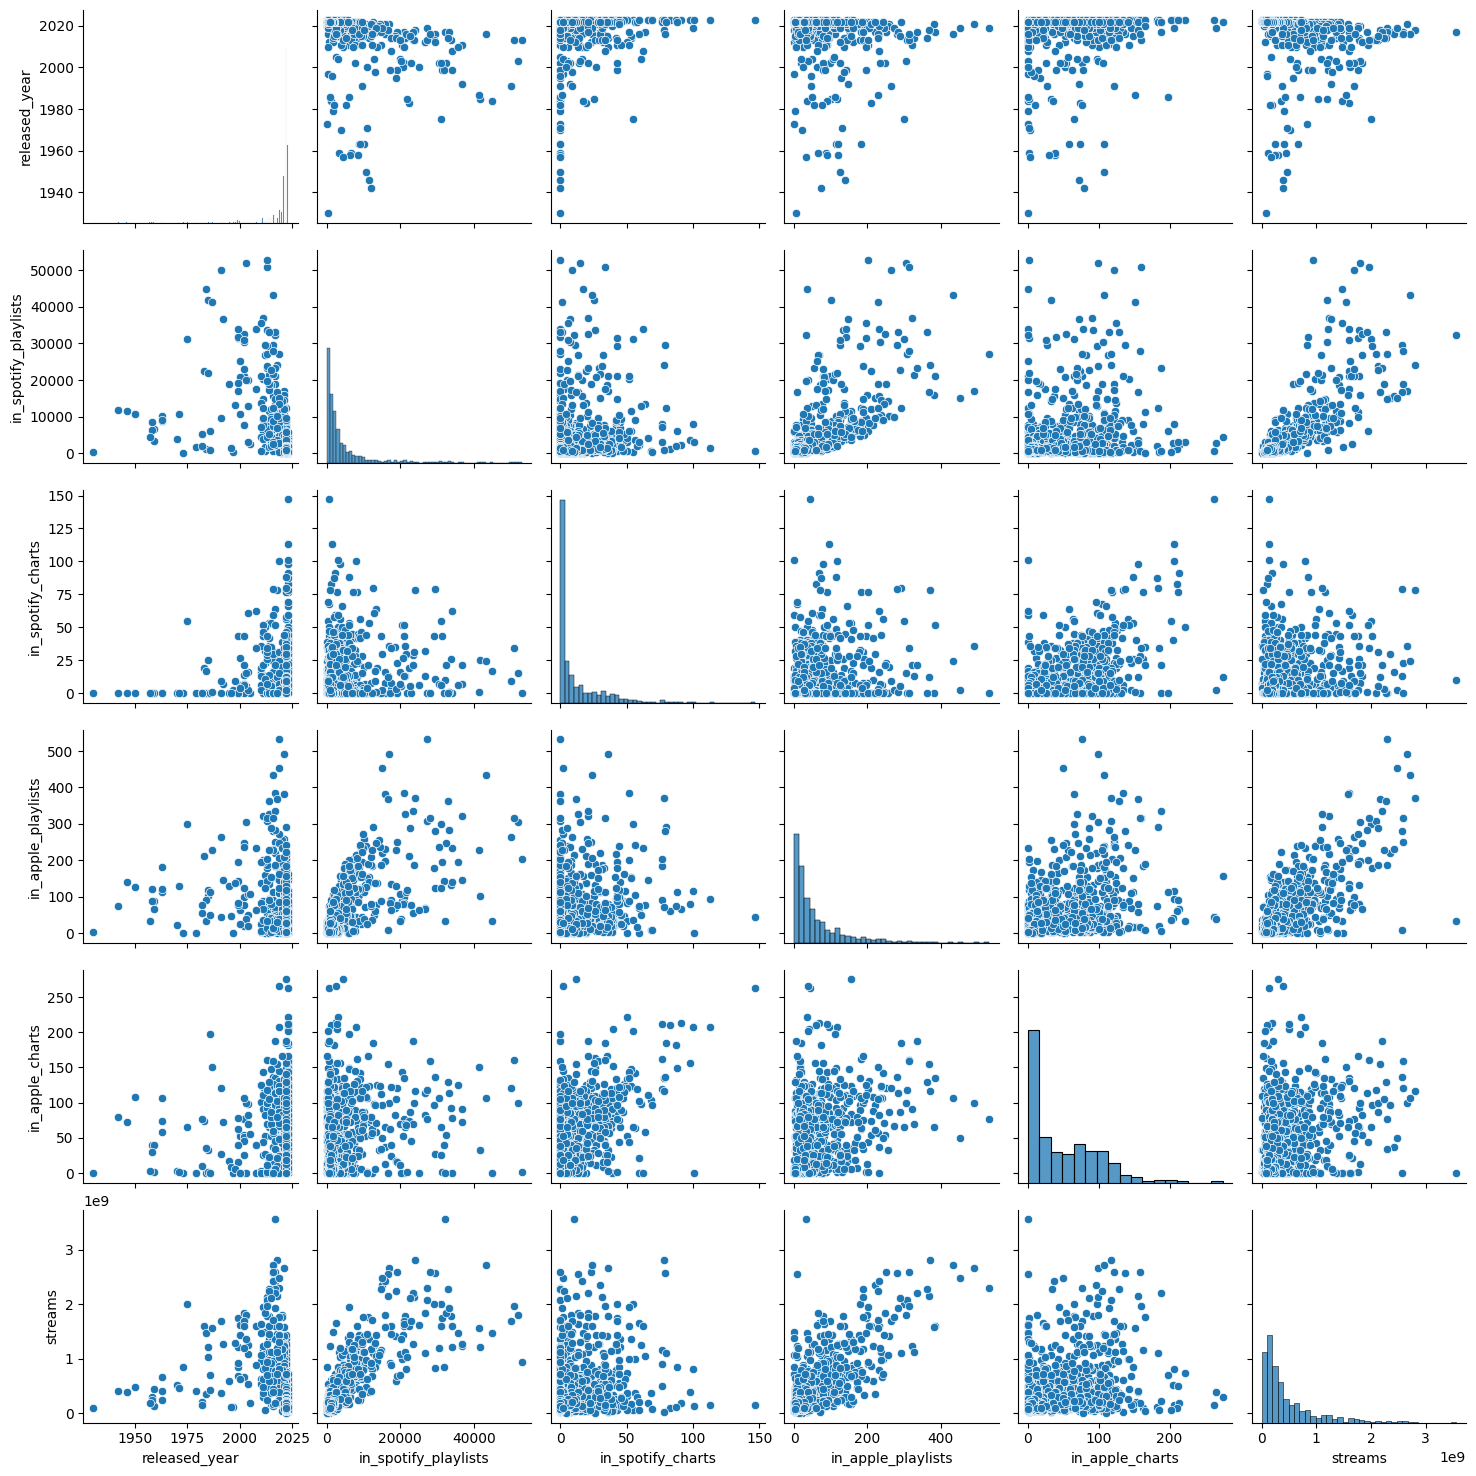

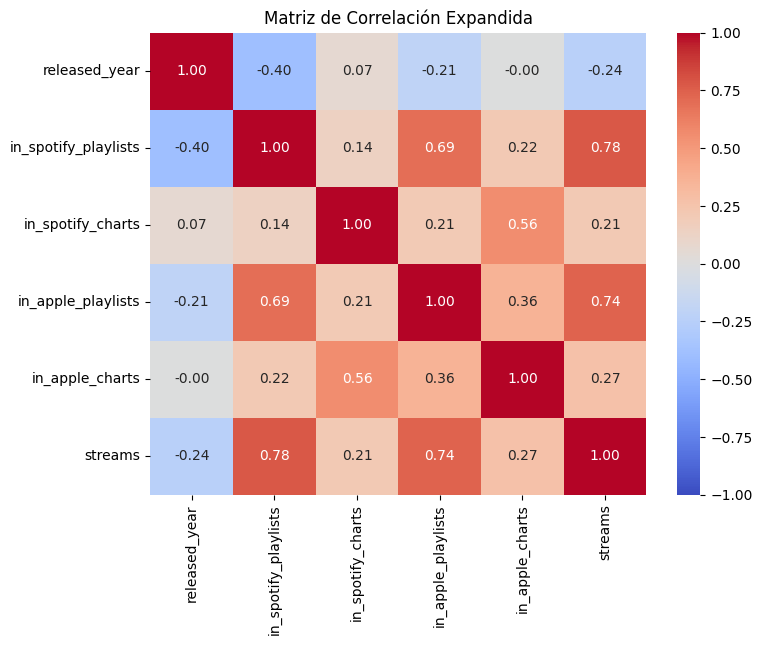

In [ ]:
# Análisis descriptivo y visual de las variables
sns.pairplot(datos[['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams']])
plt.show()

# Matriz de correlación expandida
correlation_matrix_expanded = datos[['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams']].corr()

# Aumenta el tamaño del gráfico
plt.figure(figsize=(8, 6))

sns.heatmap(data=correlation_matrix_expanded, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='coolwarm')

plt.title('Matriz de Correlación Expandida')
plt.show()


## Limpieza

In [ ]:
# Filtrar canciones desde 2010 para reducir la cantidad de ruido que el modelo recibe por
# un contexto diferenciado
condicion = datos['released_year'] >= 2010
base = datos[condicion].copy()

In [ ]:
base['released_year'].value_counts()

2022    359
2023    159
2021     95
2019     27
2020     23
2017     19
2016     17
2014     12
2013     10
2018      9
2015      9
2011      9
2012      6
2010      6
Name: released_year, dtype: int64

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            760 non-null    object 
 1   artist(s)_name        760 non-null    object 
 2   artist_count          760 non-null    int64  
 3   released_year         760 non-null    int64  
 4   released_month        760 non-null    int64  
 5   released_day          760 non-null    int64  
 6   in_spotify_playlists  760 non-null    int64  
 7   in_spotify_charts     760 non-null    int64  
 8   streams               760 non-null    float64
 9   in_apple_playlists    760 non-null    int64  
 10  in_apple_charts       760 non-null    int64  
 11  in_deezer_playlists   760 non-null    object 
 12  in_deezer_charts      760 non-null    int64  
 13  in_shazam_charts      760 non-null    object 
 14  bpm                   760 non-null    int64  
 15  key                   7

In [ ]:
base['streams'] = base['streams'].astype(int)

### Convertimos la variable Y continua en categórica

In [ ]:
base['Max_streams_C'] = ''
media = base['streams'].mean()
base['Max_streams_C'].loc[(base['streams'] >= media)] = 'Más de '+str(round(media/10e6))+' mill. de streams'
base['Max_streams_C'].loc[(base['streams'] < media)] = 'Menos de '+str(round(media/10e6))+' mill. de streams'

<ipython-input-55-cb95e5dbb13a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Max_streams_C'].loc[(base['streams'] >= media)] = 'Más de '+str(round(media/10e6))+' mill. de streams'
<ipython-input-55-cb95e5dbb13a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base['Max_streams_C'].loc[(base['streams'] < media)] = 'Menos de '+str(round(media/10e6))+' mill. de streams'


In [ ]:
base[['streams', 'Max_streams_C']]

,streams,Max_streams_C
0,141381703,Menos de 44 mill. de streams
1,133716286,Menos de 44 mill. de streams
2,140003974,Menos de 44 mill. de streams
3,800840817,Más de 44 mill. de streams
4,303236322,Menos de 44 mill. de streams
...,...,...
948,91473363,Menos de 44 mill. de streams
949,121871870,Menos de 44 mill. de streams
950,73513683,Menos de 44 mill. de streams
951,133895612,Menos de 44 mill. de streams


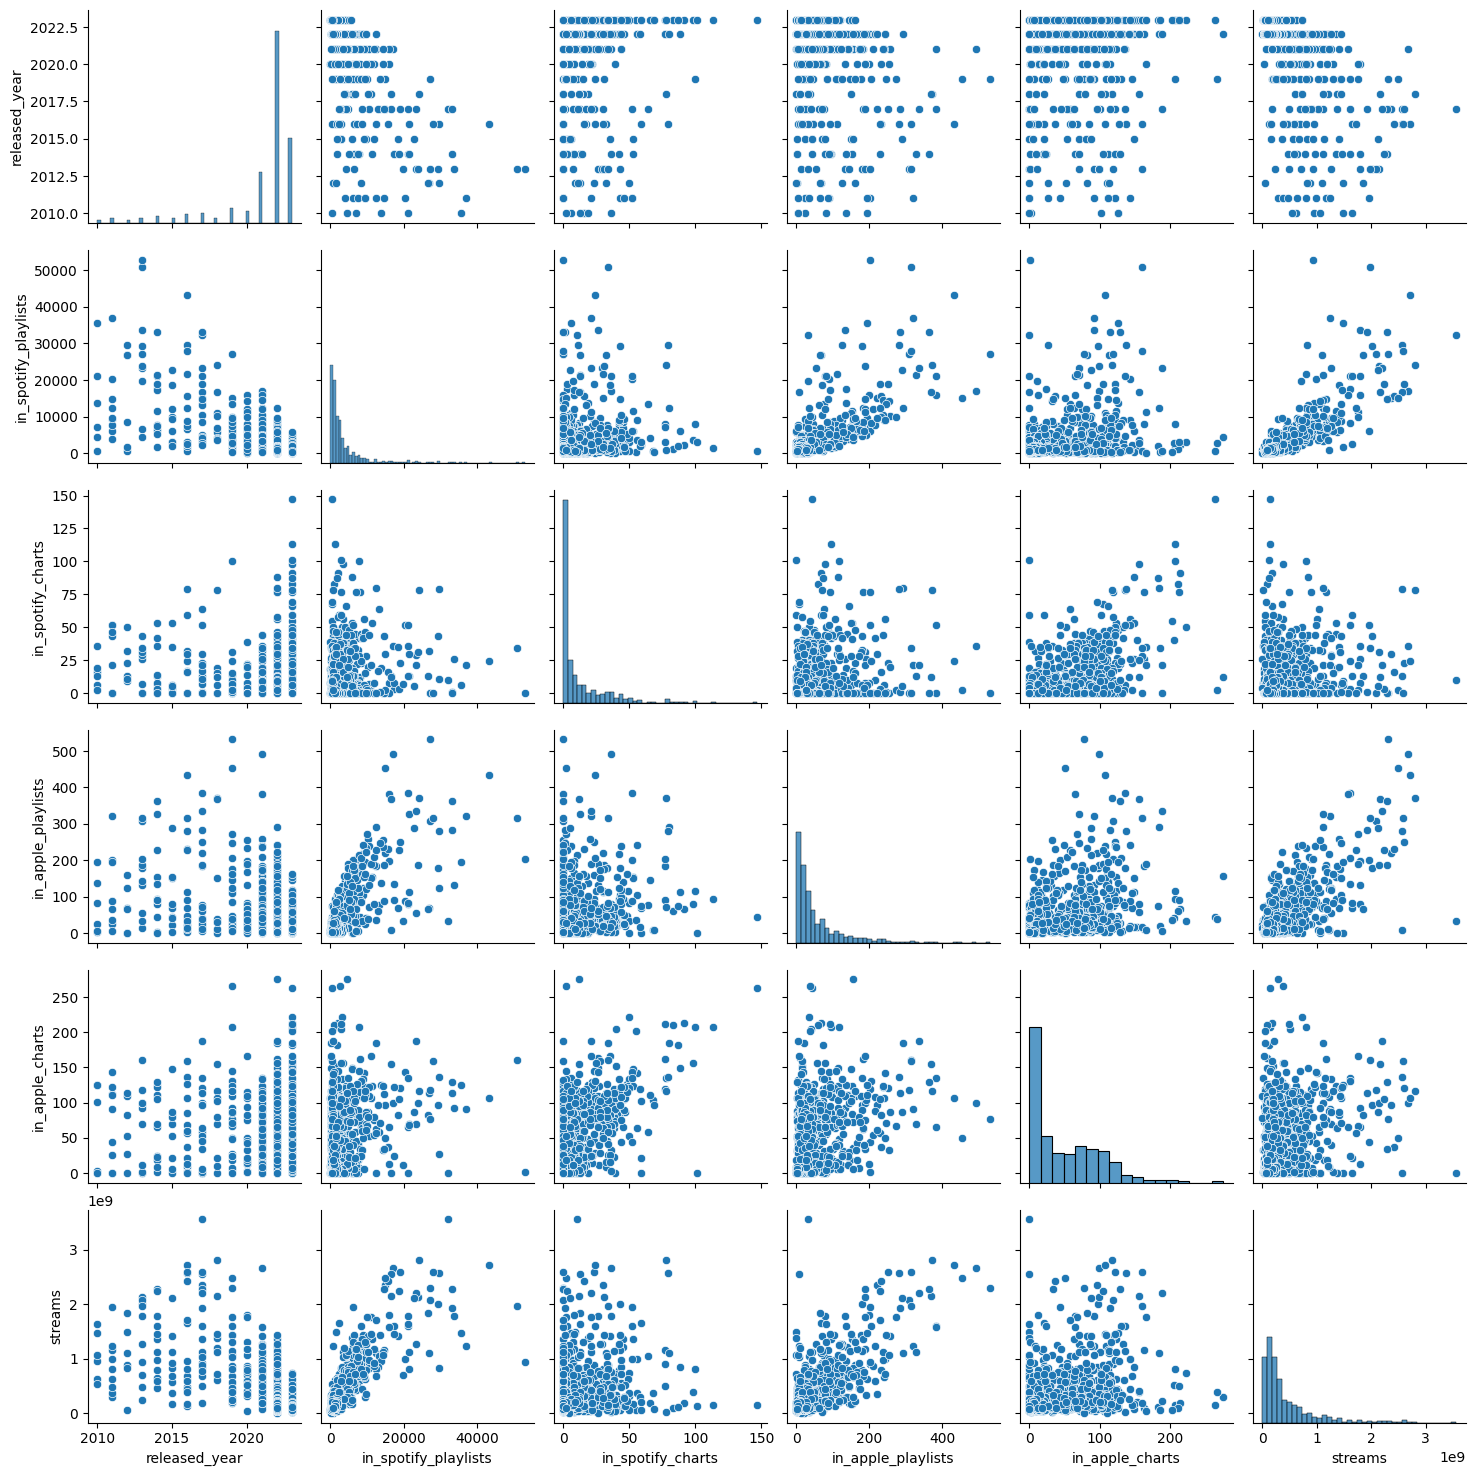

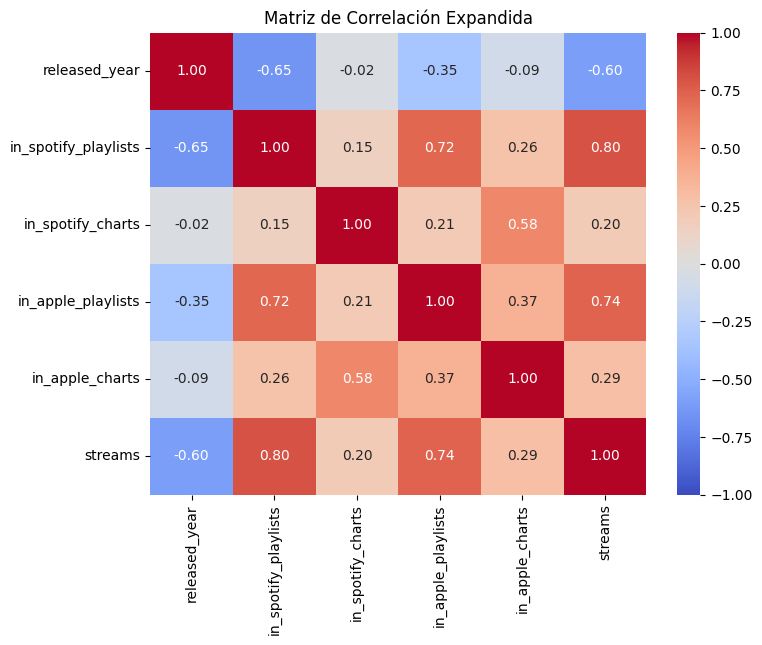

In [ ]:
# Análisis descriptivo y visual de las variables
sns.pairplot(base[['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams']])
plt.show()

# Matriz de correlación expandida
correlation_matrix_expanded = base[['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams']].corr()

# Aumenta el tamaño del gráfico
plt.figure(figsize=(8, 6))

sns.heatmap(data=correlation_matrix_expanded, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='coolwarm')

plt.title('Matriz de Correlación Expandida')
plt.show()


Empleando la base con el filtro de año superior a 2010 se observa un aumento de las correlaciones entre las variables objetivo de analisis, se determina que al eliminar el ruido aumenta la correlación significativamente para el analisis.


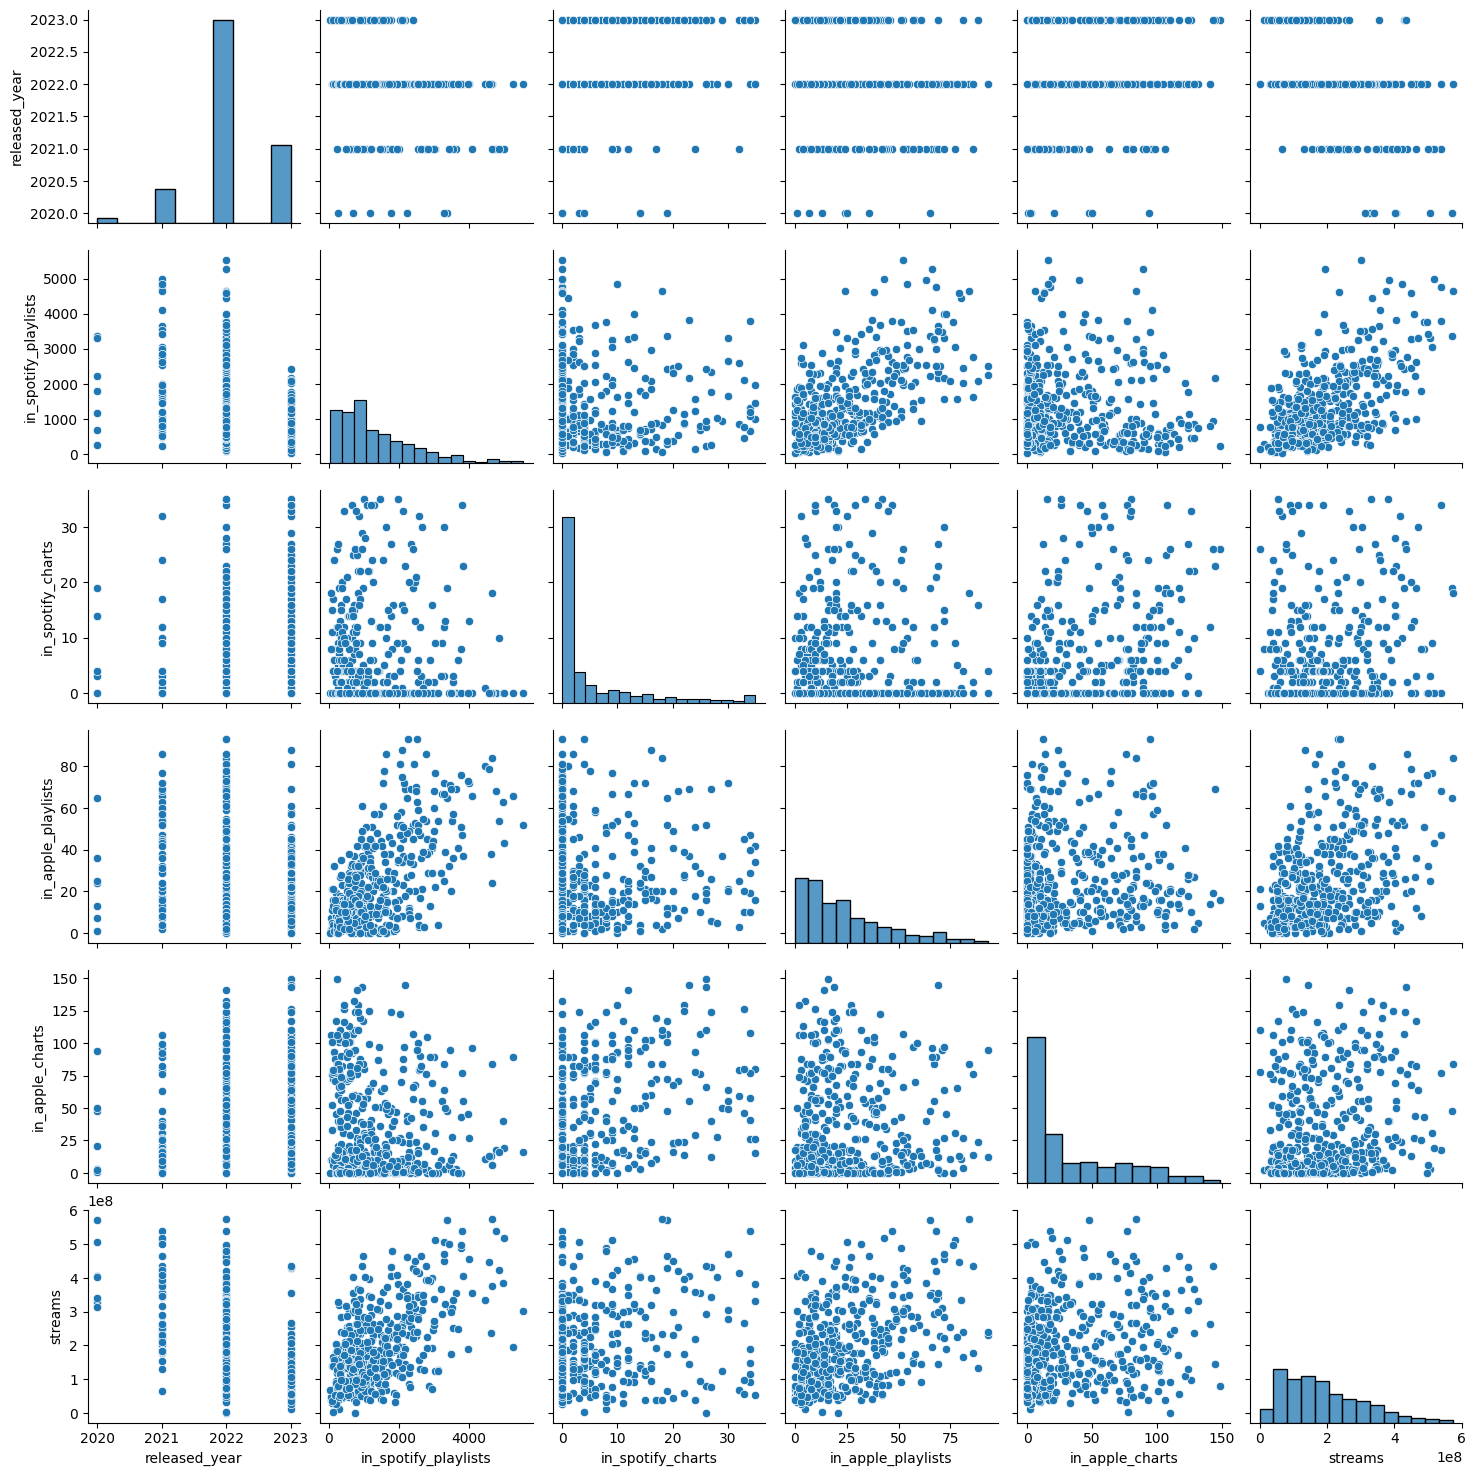

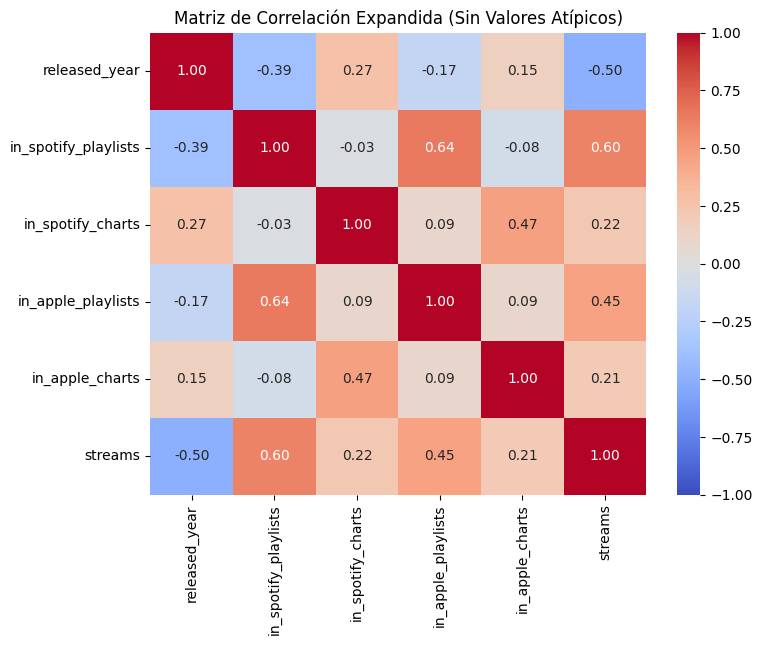

In [ ]:
import pandas as pd
import numpy as np

dataframe=base

# Función para eliminar valores atípicos basados en el rango intercuartílico (IQR)
def eliminar_valores_atipicos(dataframe, columnas):
    for columna in columnas:
        Q1 = dataframe[columna].quantile(0.25)
        Q3 = dataframe[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Filtra los valores atípicos usando el rango intercuartílico (IQR)
        dataframe = dataframe[(dataframe[columna] >= Q1 - 1.5 * IQR) & (dataframe[columna] <= Q3 + 1.5 * IQR)]

    return dataframe

# Lista de columnas para eliminar valores atípicos
columnas_eliminar_atipicos = ['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams']

# Eliminar valores atípicos
base_sin_atipicos = eliminar_valores_atipicos(base, columnas_eliminar_atipicos)

# Visualización después de eliminar valores atípicos
sns.pairplot(base_sin_atipicos[['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams']])
plt.show()

# Matriz de correlación expandida después de eliminar valores atípicos
correlation_matrix_expanded_sin_atipicos = base_sin_atipicos[['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams']].corr()

# Aumenta el tamaño del gráfico
plt.figure(figsize=(8, 6))

sns.heatmap(data=correlation_matrix_expanded_sin_atipicos, annot=True, fmt='.2f', vmax=1, vmin=-1, cmap='coolwarm')

plt.title('Matriz de Correlación Expandida (Sin Valores Atípicos)')
plt.show()


Al eliminar datos atipicos por el metodo del rango intercuartilico se observa que los datos pierden correlación y no se tiene en cuenta los datos de 2010 a 2019, por lo cual se procede a trabajar con los datos de la base sin limpieza de atipicos, se procede a realizar regresiones lineales y multivariadas **base con atipicos**.

> Bloque con sangría



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     357.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           4.56e-63
Time:                        05:07:28   Log-Likelihood:                -12925.
No. Observations:                 608   AIC:                         2.585e+04
Df Residuals:                     606   BIC:                         2.586e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.426e+11   1.28e+10     18.952      0.0

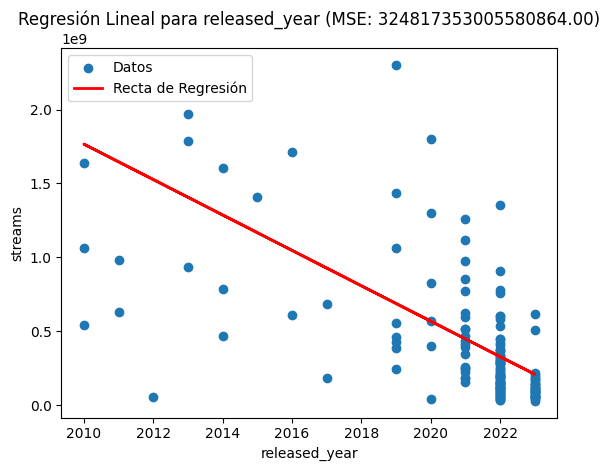

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1362.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          3.99e-157
Time:                        05:07:28   Log-Likelihood:                -12708.
No. Observations:                 608   AIC:                         2.542e+04
Df Residuals:                     606   BIC:                         2.543e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.561e+08   1.41e+07     11.034      0.0

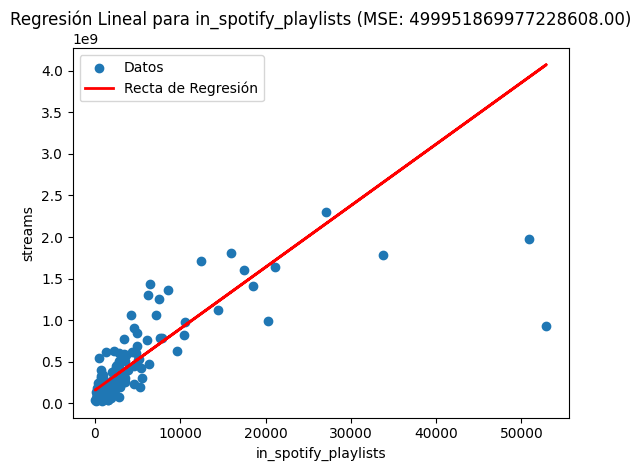

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     28.28
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.48e-07
Time:                        05:07:29   Log-Likelihood:                -13052.
No. Observations:                 608   AIC:                         2.611e+04
Df Residuals:                     606   BIC:                         2.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.785e+08   2.44e+07     15.513      0.0

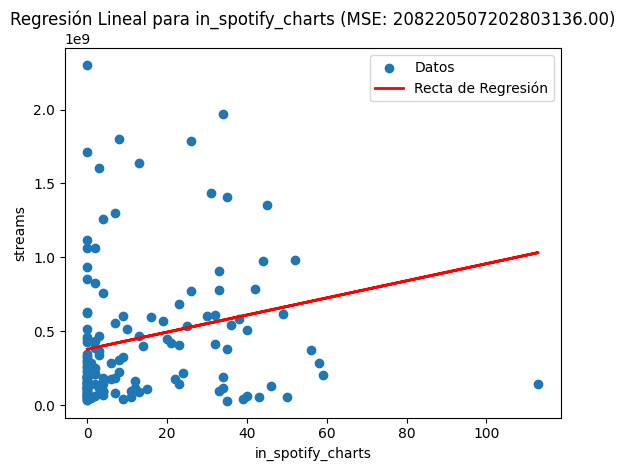

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     699.5
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          4.54e-103
Time:                        05:07:29   Log-Likelihood:                -12833.
No. Observations:                 608   AIC:                         2.567e+04
Df Residuals:                     606   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.524e+08   1.82e+07      8.360      0.0

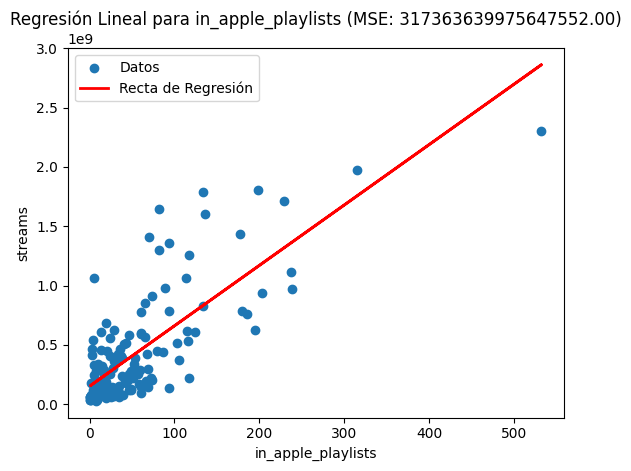

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     61.70
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.83e-14
Time:                        05:07:30   Log-Likelihood:                -13037.
No. Observations:                 608   AIC:                         2.608e+04
Df Residuals:                     606   BIC:                         2.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.888e+08   2.85e+07     10.125      0.0

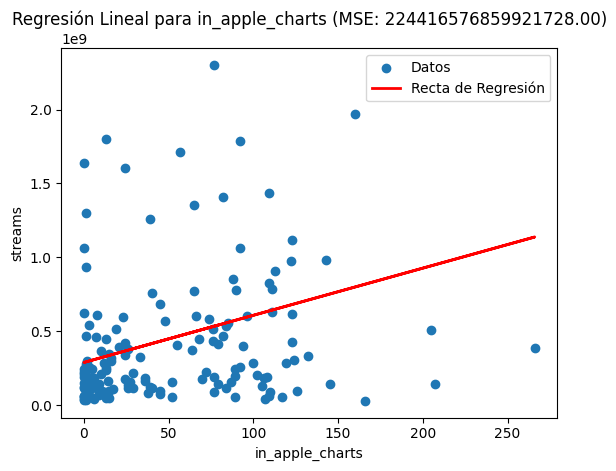

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

variables_objetivo = ['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']

# Realiza regresiones lineales y grafica para cada variable objetivo
for variable in variables_objetivo:
    # Selecciona las variables para la regresión
    X = base[variable].values.reshape(-1, 1)
    y = base['streams'].values.reshape(-1, 1)

    # Añade una constante para el término de intercepto
    X = sm.add_constant(X)

    # Divide los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crea un modelo de regresión lineal utilizando statsmodels
    modelo = sm.OLS(y_train, X_train)

    # Ajusta el modelo
    resultados = modelo.fit()

    # Imprime los resultados del modelo
    print(resultados.summary())

    # Realiza predicciones en el conjunto de prueba
    predicciones = resultados.predict(X_test)

    # Calcula el error cuadrático medio
    error_cuadratico_medio = ((y_test - predicciones) ** 2).mean()

    # Grafica los datos y la recta de regresión
    plt.scatter(X_test[:, 1], y_test, label='Datos')
    plt.plot(X_test[:, 1], predicciones, color='red', linewidth=2, label=f'Recta de Regresión')
    plt.xlabel(variable)
    plt.ylabel('streams')
    plt.title(f'Regresión Lineal para {variable} (MSE: {error_cuadratico_medio:.2f})')
    plt.legend()
    plt.show()


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     341.1
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          5.67e-173
Time:                        05:08:31   Log-Likelihood:                -12658.
No. Observations:                 608   AIC:                         2.533e+04
Df Residuals:                     602   BIC:                         2.535e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  7.03e+10 

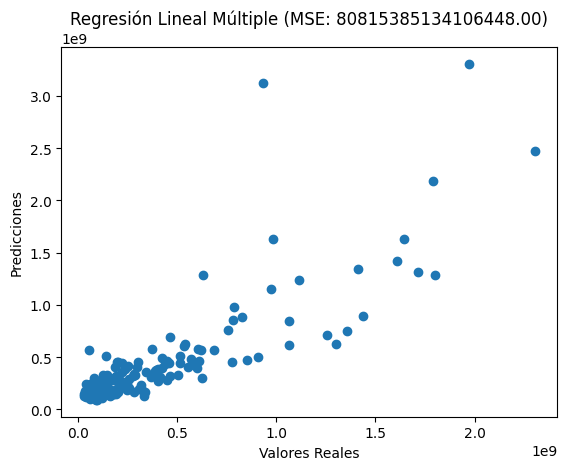

In [ ]:
from sklearn.model_selection import train_test_split

# Lista de variables objetivo para las regresiones lineales
variables_objetivo = ['released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']

# Selecciona todas las variables predictoras
X = base[variables_objetivo]

# Añade una constante para el término de intercepto
X = sm.add_constant(X)

# Variable dependiente
y = base['streams']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal múltiple utilizando statsmodels
modelo = sm.OLS(y_train, X_train)

# Ajusta el modelo
resultados = modelo.fit()

# Imprime los resultados del modelo
print(resultados.summary())

# Realiza predicciones en el conjunto de prueba
predicciones = resultados.predict(X_test)

# Calcula el error cuadrático medio
error_cuadratico_medio = ((y_test - predicciones) ** 2).mean()

# Grafica las predicciones frente a los valores reales
plt.scatter(y_test, predicciones)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Regresión Lineal Múltiple (MSE: {error_cuadratico_medio:.2f})')
plt.show()


# Analisis de regresión multivariada

En resumen, el modelo de regresión lineal múltiple aplicado a las variables predictoras 'released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists' y 'in_apple_charts' para predecir 'streams' muestra que alrededor del 73.9% de la variabilidad en las transmisiones se explica por estas variables. El valor p asociado al estadístico F es extremadamente bajo, indicando que el modelo en su conjunto es estadísticamente significativo. Esto sugiere que las variables predictoras tiene un impacto significativo en los streams. Al examinar los coeficientes, se observa que 'released_year' y 'in_apple_charts' tienen valores p que sugieren que podrían no ser estadísticamente significativas, mientras que las otras variables parecen tener un impacto significativo en las transmisiones. Sin embargo, son variables que afectan directamente a los streams.

Además, los intervalos de confianza para los coeficientes proporcionan un rango plausible de valores para cada variable con un cierto nivel de confianza. Por ejemplo, el intervalo de confianza para 'released_year' indica que el efecto promedio de este predictor en las transmisiones podría oscilar entre aproximadamente -46.1 millones y -23.3 millones. En general, el análisis destaca la importancia de considerar tanto la significancia estadística como la interpretación práctica de los coeficientes para comprender la relación entre las variables predictoras y la variable dependiente 'streams'.

## Algunas descriptivas

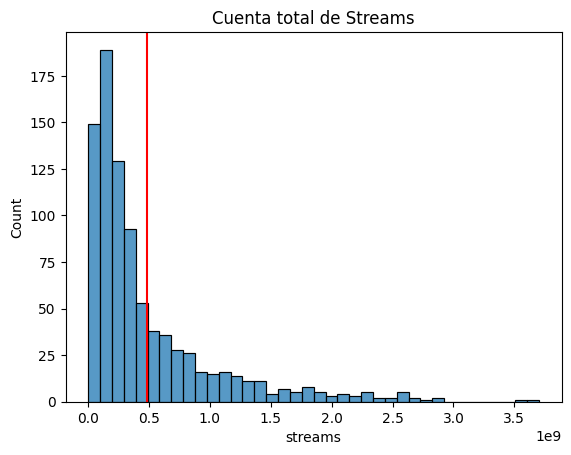

In [ ]:
plt.title('Cuenta total de Streams')
sns.histplot(data=base, x='streams')
plt.axvline(base['streams'].mean(), color='red')

**Nota:** Vemos que es una base de datos de música muy top en el mercado. El promedio de streams es 400 millones (relativamente alto).

In [ ]:
base['streams'].describe()

count    8.840000e+02
mean     4.851801e+08
std      5.564953e+08
min      2.762000e+03
25%      1.366863e+08
50%      2.720219e+08
75%      6.082550e+08
max      3.703895e+09
Name: streams, dtype: float64

In [ ]:
base['Max_streams_C'].value_counts()

Menos de 49 mill. de streams    612
Más de 49 mill. de streams      272
Name: Max_streams_C, dtype: int64

## Modelo para contrastar

### Logit

El objetivo del ejercicio es que usted construya un clasificador diferente al del modelo logarítmico y compare sus resultados contra este. Tenemos principalmente dos categorías:

* Entre **Menos de 49 mill. de streams**
* Entre **Más de 49 mill. de streams**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Definimos 1 como estar en la categoría de muchos streams
y = base['Max_streams_C'] == 'Más de 49 mill. de streams'
y = y + [0] * len(y)
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Max_streams_C, dtype: int64

In [ ]:
X = base[['in_spotify_playlists', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
X.head()

,in_spotify_playlists,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,553,80,89,83,31,0,8,4
1,1474,71,61,74,7,0,10,4
2,1397,51,32,53,17,0,31,6
3,7858,55,58,72,11,0,11,15
4,3133,65,23,80,14,63,11,6


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
modeloLog  = LogisticRegression(random_state=16)

In [ ]:
# Ajustamos el modelo con los datos de entrenamiento (70%)
modeloLog.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [ ]:
probabilidades = modeloLog.predict_proba(X_test)[:,1]

In [ ]:
from sklearn import metrics

In [ ]:
umbral = 0.2
pred = probabilidades >= umbral
pred = pred + [0] * len(pred)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:
matriz = metrics.confusion_matrix(y_test, pred)
matriz

array([[162,  22],
       [  8,  74]])

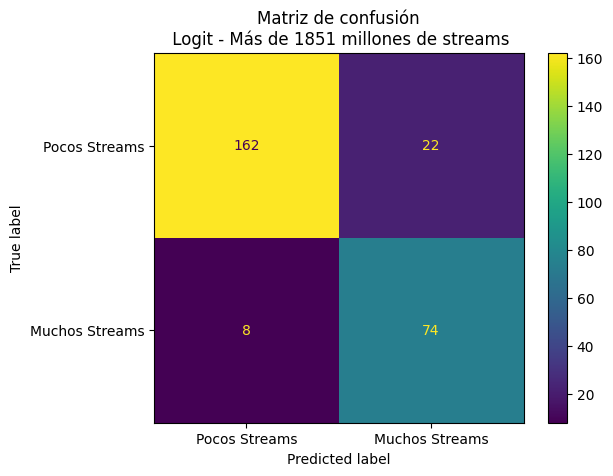

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz, display_labels = ['Pocos Streams','Muchos Streams'])
cm_display.plot()
plt.title('Matriz de confusión\n Logit - Más de 1851 millones de streams')
plt.show()

In [ ]:
# Accuracy:
(162 + 74)/(162 + 22 + 8 +74)

0.8872180451127819

## Modelo alternativo (15 puntos)

Para este ejercicio, siga las siguientes instrucciones. No se tendrá en cuenta si su modelo mejora el desempeño de la predicción, sino la rigurosidad de su desarrollo.

### 1. Escoja un nuevo modelo de clasificación

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

### 2. Entrene el modelo

In [ ]:
modeloRF = RandomForestClassifier(random_state=16)
modeloRF.fit(X_train, y_train)

RandomForestClassifier(random_state=16)

### 3. Haga las predicciones correspondientes

In [ ]:
y_pred = modeloRF.predict(X_test)

### 4. Elabore la matriz de confusión y calcule la precisión (accuracy)

Matriz de Confusión:
[[176   8]
 [ 17  65]]

Precisión del modelo de Bosque Aleatorio: 0.9060150375939849


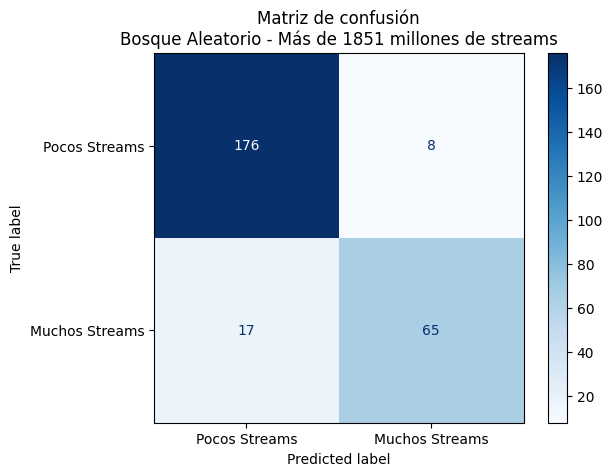

0.9060150375939849

In [ ]:
# Calcular la matriz de confusión y la precisión
matriz_confusion = confusion_matrix(y_test, y_pred)
precision = accuracy_score(y_test, y_pred)

# Imprimir la matriz de confusión y la precisión
print('Matriz de Confusión:')
print(matriz_confusion)
print('\nPrecisión del modelo de Bosque Aleatorio:', precision)

# Visualizar la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Pocos Streams', 'Muchos Streams'])
cm_display.plot(cmap='Blues', values_format='d')

plt.title('Matriz de confusión\nBosque Aleatorio - Más de 1851 millones de streams')
plt.show()

# Accuracy:
(176+ 65)/(176+ 65 + 8 +17)

### 5. Haga un análisis de hiperparámetros para escoger la mejor versión de su modelo

In [ ]:
parametros_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=16), parametros_grid, cv=5)
grid_search.fit(X_train, y_train)

mejores_parametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_

# Resultados de la búsqueda en cuadrícula
print('\nMejores hiperparámetros:')
print(mejores_parametros)


Mejores hiperparámetros:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Evaluación del modelo de Bosque Aleatorio con los mejores hiperparámetros
y_pred_rf_optimized = mejor_modelo.predict(X_test)
precision_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)

# Evaluación del modelo logit
y_pred_logit = modeloLog.predict(X_test)
precision_logit = accuracy_score(y_test, y_pred_logit)

# Comparación
print('Precisión del modelo de Bosque Aleatorio (optimizado):', precision_rf_optimized)

Precisión del modelo de Bosque Aleatorio (optimizado): 0.9172932330827067


### 6. Escoja entre el modelo logit y su modelo a la luz de sus resultados, comente

In [ ]:
# Modelo logit (modeloLog)
y_pred_logit = modeloLog.predict(X_test)
precision_logit = accuracy_score(y_test, y_pred_logit)

print('\nPrecisión del modelo logit:', precision_logit)
print('\nPrecisión del modelo de Bosque Aleatorio:', precision)
print('\nPrecisión del modelo de Bosque Aleatorio (optimizado por hiperparametros):', precision_rf_optimized)



Precisión del modelo logit: 0.8984962406015038

Precisión del modelo de Bosque Aleatorio: 0.9060150375939849

Precisión del modelo de Bosque Aleatorio (optimizado por hiperparametros): 0.9172932330827067


**Comentario:**

## Análisis de resultados (10 puntos)

Realice un análisis de resultados corto (hasta 300 palabras) considerando:
- **Datos trabajados (1 punto)**:
Se empleo un conjunto de datos historicos de Spotify sobre canciones, incluyendo caracteriasticas musicales, datos de reproducción y etiquetas binarias que nos indican si una canción de la base de datos tiene mas de 1851 millones de streams o no. Se empleo una matriz de correlación donde se observo que las variables con mayor correlación con el numero de streams son : 'released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'streams'.

- **Resultados obtenidos (3 puntos)**: Los modelos de clasificación aplicados a los datos musicales de spotify han arrojado presiciones altas, indicando que los modelos son altamente efectivos para la clasificación de los datos. La Regresión Logística exhibió una precisión del 89.85%, mientras que el modelo de Bosque Aleatorio sin ajute de hiperparametros superó ligeramente este rendimiento con una precisión del 90.60%. Sin embargo, al ajustar los hiperparametros del modelo de bosque aleatorio se observó que logró una precisión del 91.73%. Estos resultados indican la eficacia de los modelos para distinguir canciones populares de aquellas menos populares basándose en características musicales y datos de reproducción en plataformas de streaming.

- **Cifras principales de los resultados obtenidos (2 puntos)**: Precisión del modelo logístico: 89.85%, precisión del Bosque Aleatorio (sin optimizar): 90.60% ypPrecisión del Bosque Aleatorio (optimizado): 91.73%. Estas cifras resaltan el rendimiento robusto de los modelos, con mejoras notables al emplear técnicas de optimización en el Bosque Aleatorio. La precisión, medida fundamental en problemas de clasificación, evidencia la capacidad de los modelos para realizar predicciones precisas sobre la popularidad de una canción. Estas cifras respaldan la utilidad de las características musicales y datos de reproducción como predictores de éxito en la industria musical, con el Bosque Aleatorio optimizado destacándose como el modelo más eficaz en esta tarea.

- **Consideraciones sobre el modelo o modelos escogidos de comparación (2 puntos)**:
Se empleo el modelo de bosque aleatorio por su capacidad para manejar relaciones no lineales y su capacidad de trabajar con diversos tipos de datos, en nuestro caso es adecuado para manejar clasificación binaria. Ademas, emplear bosque aleatorio nos permite manejar conjuntos grandes y es menos sensible a la multicolinealidad

- **Limitaciones del análisis ( 2 puntos)**: La principales limitaciones del bosque aleatorio es su naturaleza de caja negra, la calidad de los resultados es dependiente de la naturaleza de los datos, es decir de su calidad y su distribución. Además, se debe tener en cuenta que pueden existir factores que no se tienen en cuenta para el analisis y el exito de streaming de una canción puede depender de ciertos factores externos, como tendencias culturales (ejemplo TIktok), pais de origen, giras, publicidad, etc. que pueden influir en el numero de reproducciones.

### Forma del notebook (5 puntos)
Criterios:
* El notebook incluye código funcional y presenta los resultados (3 puntos)
* Los resultados se encuentran cometados dentro del notebook (1 punto)
* El código se encuentra comentado explicando qué realiza cada componente y las observaciones relevantes sobre implementación (1 punto)

# Puntos extra (hasta 5 puntos)
Hasta 5 puntos adicionales si se incluyen uno o varios de los siguientes componentes:
- Analisis exploratorio de datos
- Incluir componentes de Crisp DM
- Técnicas adicionales, si aplican (clustering, ACP)
- Caracterización y tratamiento de faltantes y atípicos